Creating Data Dictionary for Heart Failure Analysis report

1. Age - age in years
2. Sex - (M = male; F = female)
3. ChestPainType-
        TA: Typical angina: chest pain related decrease blood supply to the heart
        ATA: Atypical angina: chest pain not related to heart
        NAP: Non-anginal pain: typically esophageal spasms (non heart related)
        ASY: Asymptomatic: chest pain not showing signs of disease 
4. Restingbp- resting blood pressure (in mm Hg on admission to the hospital) above 130-140 is cause of concern
5. FastingBS- fasting blood sugar levels,should be under 120mm/dl
              true if fbs is greater than 120
6. Cholesterol- cholestoral content in body(mg/dl)
                >200-> unhealthy condition
7. RestingECG-
             ST:Wave abnormality
                →can range from mild symptoms to severe problems
                →signals non-normal heart beat
             LVH:Left ventricular hypertrophy(enlarged heart's
                 main pumping chamber) 
             Normal:Healthy heart beat is reported
8. MaxHR-maximum heart rate achieved
9. ExerciseAngina- exercise induced chest pain (y= yes;n= no)
10. Oldpeak- Depression seen in ST wave of ECG induced due to 
            exercise relative to restingECG.It shows stress varies on healthy and unhealthy heart.More will be the stress more steep will be depersssion.
11. ST_Slope-ST wave reading of ECG in different patients due to exercise.
             ->Up: healthy heart condition
             ->Flat:slightly bad condition
             ->Down:unhealthy condition
12. HeartDisease- any medical history of patient related to heart or any other(1-yes;0-no)


In [196]:
# Importing required python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

# For showing plots in IPython shell and not in seprate output window
%matplotlib inline


In [197]:
# Uploading our dataset

df=pd.read_csv(r"C:\Users\hp\Downloads\archive\archive\heart.csv")

# Printing first 10 reading of our data set
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [198]:
# printing last 10 rows of oyr datset
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [199]:
# Dimension of our dataset(rows,columns)
# moreover shape is not a method it is an attribute of pandas dataframe
df.shape
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  918
Number of columns:  12


In [200]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [201]:
# Information of our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [202]:
# Number of unique values in each column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [203]:
#checking null values in our dataset
# df.isnull().sum() this method can be used to do sum of all the null values in our dataset
# True- null value is present and False- not present
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [204]:
# Checking for any duplicate values in our dataset

duplicated=df.duplicated().sum()
if duplicated:
    print("number of duplicate rows:".format(duplicated))
else:
    print('Dataset contains no duplicate rows')

Dataset contains no duplicate rows


In [205]:
# Getting overall statistics of our datset

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [206]:
# Drawing a correlation matrix between different parameters in our dataset
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_30492\348823633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_30492\3438882955.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


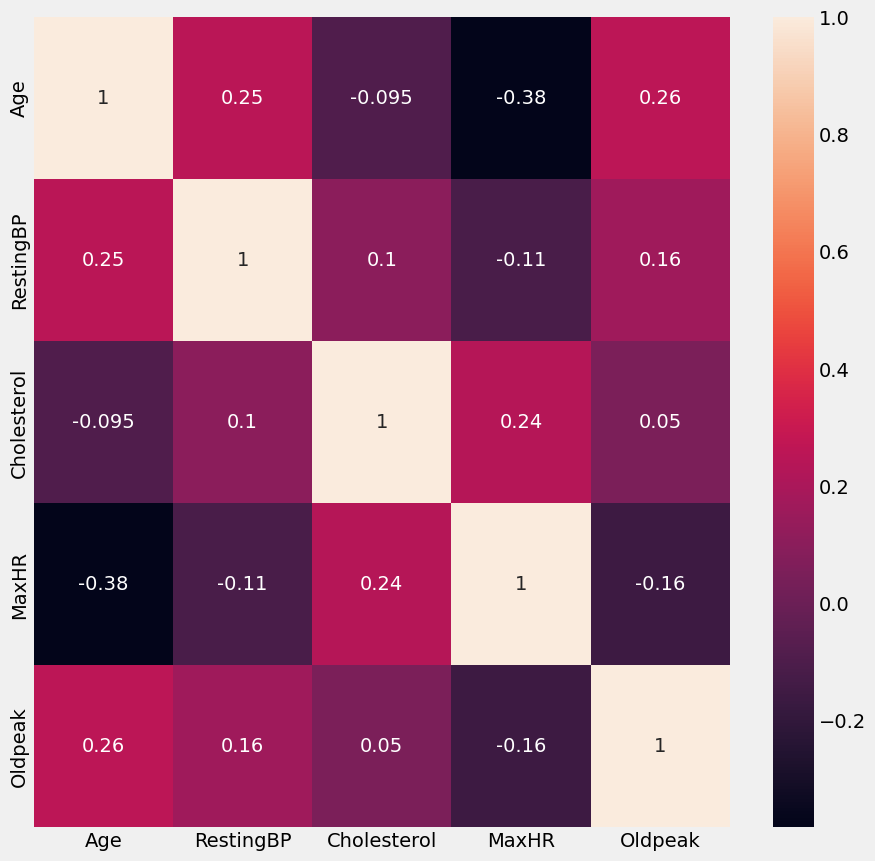

In [216]:
# converting this correlation matrix in sns heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# for removing extra strings in our output
plt.show()

In [292]:
df['HeartDisease']=df.HeartDisease.replace({1:"Disease",0:"NoDisease"})
df['Sex']=df.Sex.replace({1:'Male',0:'Female'})
df['ChestPainType']=df.ChestPainType.replace({0:"TA",1:"ATA",2:"NAP",3:"ASY"})
df['ExerciseAngina']=df.ExerciseAngina.replace({1:"Yes",0:"No"})
df['FastingBS']=df.FastingBS.replace({1:">120",0:"<120"})
df['ST_Slope']=df.ST_Slope.replace({0:"Up",1:"Flat",2:"Down"})
df['RestingECG']=df.RestingECG.replace({0:"ST",1:"LVH",2:"Normal"})
df['Age']=df.Age.replace({})

In [293]:
# Checking how many people are alredy suffering from heart disease
# value counts returns number of input under same parameter
# 0- no medical history ; 1-prone to heart failure

df['HeartDisease'].value_counts()

Disease      508
NoDisease    410
Name: HeartDisease, dtype: int64

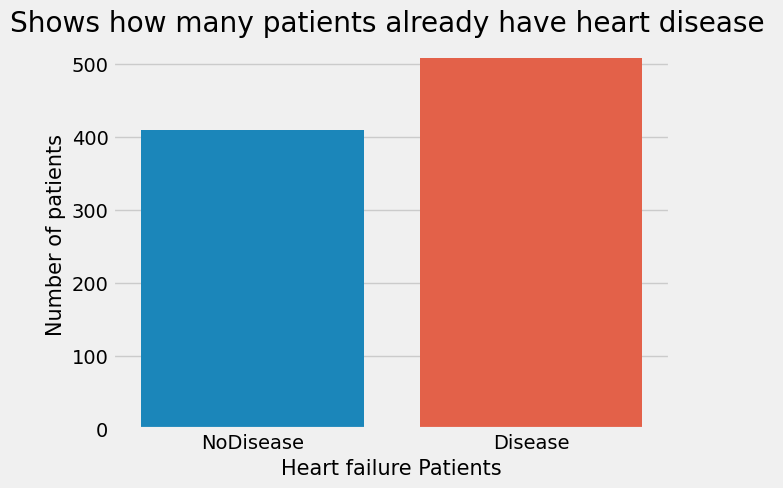

In [294]:
# ploting sns count plot
# can use plt.xticks([orignal],[new]) to change bar name 

plot=sns.countplot(x='HeartDisease',data=df,)
plt.xlabel("Heart failure Patients",size=15)
plt.ylabel("Number of patients",size=15)
plt.title("Shows how many patients already have heart disease ")
plt.show()

In [295]:
# Number of male and female
df['Sex'].value_counts()
# error fail to plot count plot 

M    725
F    193
Name: Sex, dtype: int64

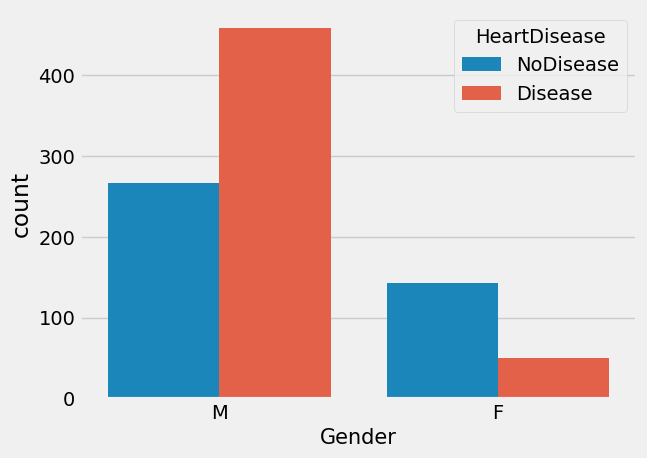

In [296]:
# Gender distribution according to Heart disease
sns.countplot(x="Sex",hue="HeartDisease",data=df)
plt.xlabel("Gender",size=15)
plt.show()

Text(0, 0.5, 'Number of patients')

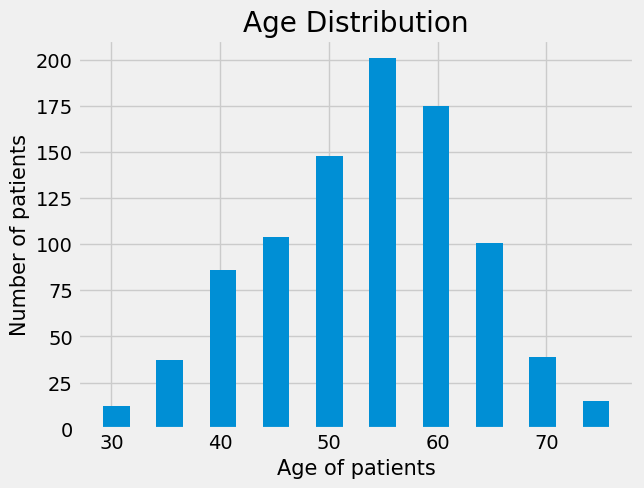

In [297]:
# Age distribution of our dataset

df['Age'].hist(rwidth=0.5).plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel("Age of patients",size=15)
plt.ylabel("Number of patients",size=15)

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
Name: Age, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_30492\874190404.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(df.Age.value_counts()[:10])
C:\Users\hp\AppData\Local\Temp\ipykernel_30492\874190404.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=df.Age.value_counts()[:10].index,y=df.Age.value_counts()[:10].values,palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_30492\874190404.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype ind

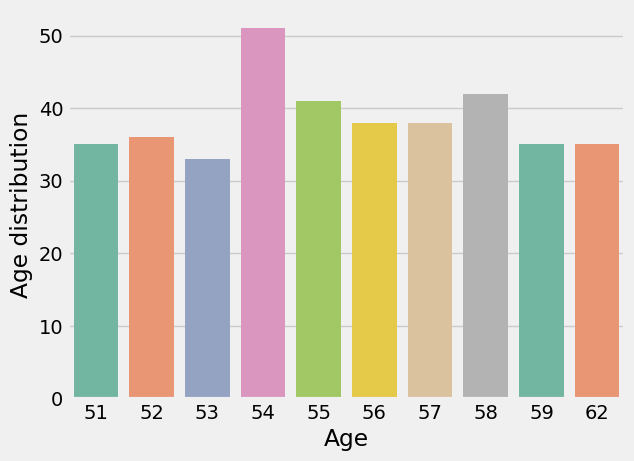

In [ ]:
# Age distribution of some amount of age groups

print(df.Age.value_counts()[:10])
sns.barplot(x=df.Age.value_counts()[:10].index,y=df.Age.value_counts()[:10].values,palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')
plt.show()

In [ ]:
# for finding youngest and oldsest
print(min(df.Age))
print(max(df.Age))
print(df.Age.mean())

28
77
53.510893246187365


In [298]:
# Ploting graph for chest pain type to check which chest type is more comman
#sns.countplot(df['ChestPainType']) size limit excced error is coming

In [407]:
# Chest pain distribution as per heart disease is concerned

# print(df.ChestPainType.value_counts()[:10])
# print(df.HeartDisease.value_counts()[:10])
# sns.barplot(x=df.ChestPainType.value_counts()[:10].index,y=df.HeartDisease.value_counts()[:10].values,data=df)
# plt.show()

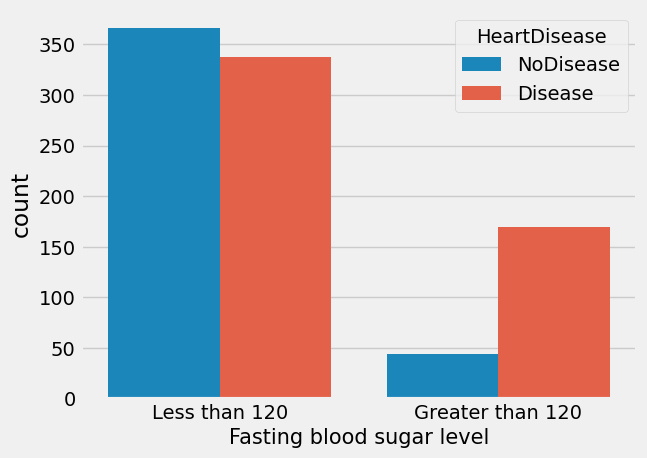

In [408]:
# Fasing blood sugar distribution according to target variable
sns.countplot(x="FastingBS",hue="HeartDisease",data=df)
plt.xlabel("Fasting blood sugar level",size=15)
plt.xticks([0,1],["Less than 120","Greater than 120"])
plt.show()

<AxesSubplot: >

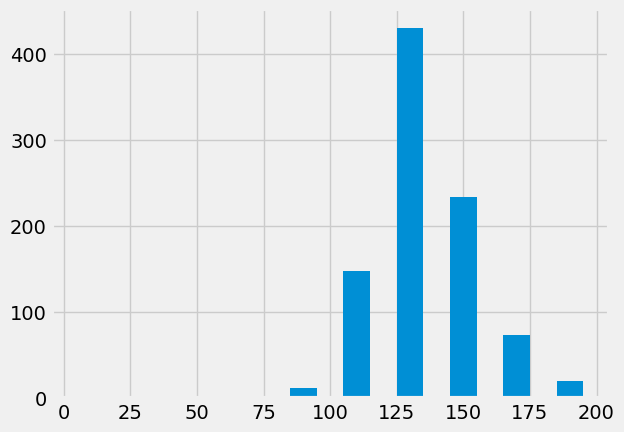

In [409]:
# Checking resting blood pressure distribution
df['RestingBP'].hist(rwidth=0.5)

c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


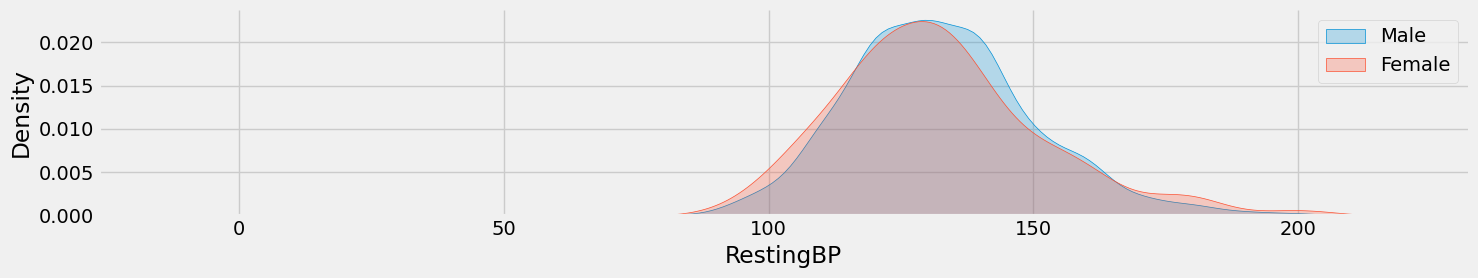

In [410]:
# Blood pressure variation with gender

a=sns.FacetGrid(df,hue="Sex",aspect=5)
a.map(sns.kdeplot,"RestingBP",shade=True)
plt.legend(labels=['Male','Female'])

Text(0, 0.5, 'Number of patients')

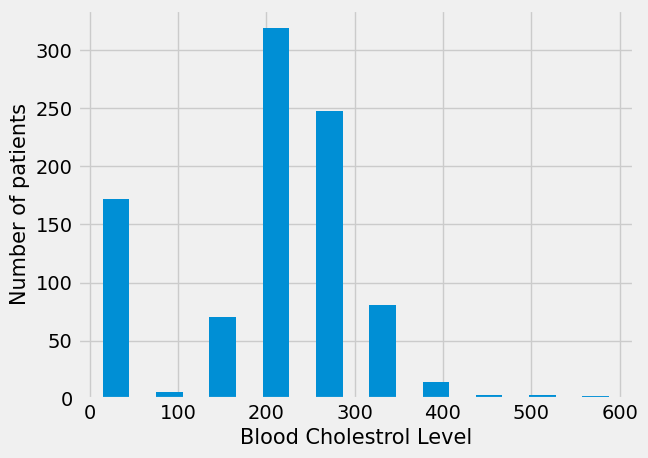

In [411]:
# Distribution of cholestrol in patients
df['Cholesterol'].hist(rwidth=0.5)
plt.xlabel("Blood Cholestrol Level",size=15)
plt.ylabel("Number of patients",size=15)

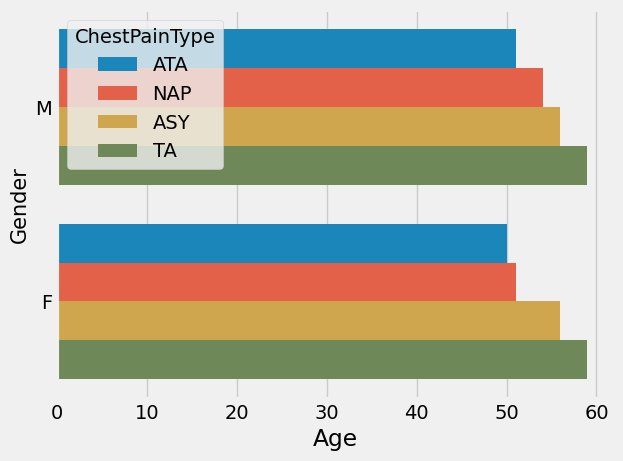

In [412]:
# Chest pain variation among differnt age groups also differentiating the gender 

sns.barplot(x='Age',y='Sex',hue='ChestPainType',data=df,estimator=np.median,errorbar=('ci',0))
plt.ylabel("Gender",size=15)
plt.show()